# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `data/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [3]:
df = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv', nrows=400000)

c:\users\simon\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#my machine is a bit old so 400'000 is all i can get in 20 seconds

### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [5]:
%%time
df = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv', nrows=400000)

<string>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 24.6 s


### Look at the first few rows

Make sure you can see **every single column.**

In [6]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,545 WEST 144 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825104,-73.949368,"(40.825104318551325, -73.94936777115372)"
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,UTICA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640965,-73.929232,"(40.64096464471428, -73.92923194083798)"
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11210.0,GLENWOOD ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634384,-73.941525,"(40.63438406330588, -73.9415248319131)"


In [7]:
pd.set_option("display.max_columns", 53)

In [8]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,545 WEST 144 STREET,WEST 144 STREET,AMSTERDAM AVENUE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09/05/2015 05:15:43 AM,The Police Department responded to the complai...,09/04/2015 10:32:02 PM,09 MANHATTAN,MANHATTAN,998263.0,239889.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825104,-73.949368,"(40.825104318551325, -73.94936777115372)"
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,UTICA AVENUE,UTICA AVENUE,AVENUE D,FOSTER AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/05/2015 09:06:57 AM,The Police Department responded to the complai...,09/05/2015 02:26:44 AM,17 BROOKLYN,BROOKLYN,1003890.0,172805.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640965,-73.929232,"(40.64096464471428, -73.92923194083798)"
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11210.0,GLENWOOD ROAD,GLENWOOD ROAD,BROOKLYN AVENUE,EAST 37 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/04/2015 03:48:25 PM,The Police Department responded to the complai...,09/04/2015 05:21:19 PM,17 BROOKLYN,BROOKLYN,1000480.0,170405.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634384,-73.941525,"(40.63438406330588, -73.9415248319131)"


### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [9]:
%%time
df = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv', nrows=400000, usecols=['Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor'])

Wall time: 9.11 s


In [11]:
#We save more than 50% of time

In [12]:
df.head()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage


## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [13]:
df_10000 = df.head(10000)

In [14]:
%%time
pd.to_datetime(df_10000['Created Date'])

Wall time: 9.51 s


0      2015-09-04 22:55:25
1      2015-09-04 13:53:45
2      2015-09-04 21:15:43
3      2015-09-05 01:06:57
4      2015-09-04 07:48:25
5      2015-09-04 11:31:12
6      2015-09-04 07:02:24
7      2015-09-04 12:34:05
8      2015-09-04 19:56:42
9      2015-09-04 21:04:42
10     2015-09-04 20:26:09
11     2015-09-04 11:07:15
12     2015-09-04 22:23:59
13     2015-09-04 23:16:12
14     2015-09-04 16:49:55
15     2015-09-04 14:39:46
16     2015-09-04 20:21:22
17     2015-09-04 23:34:23
18     2015-09-04 21:55:19
19     2015-09-04 23:44:07
20     2015-09-04 08:12:10
21     2015-09-04 23:14:40
22     2015-09-04 20:17:20
23     2015-09-04 22:54:59
24     2015-09-04 15:45:14
25     2015-09-04 23:48:20
26     2015-09-05 01:53:40
27     2015-09-04 23:34:47
28     2015-09-04 23:37:52
29     2015-09-04 23:01:37
               ...        
9970   2015-09-07 13:39:12
9971   2015-09-07 06:53:28
9972   2015-09-07 06:10:00
9973   2015-09-07 04:02:27
9974   2015-09-07 09:00:33
9975   2015-09-07 07:13:20
9

In [15]:
%%time
pd.to_datetime(df_10000['Created Date'], format="%m/%d/%Y %I:%M:%S %p")

Wall time: 234 ms


0      2015-09-04 22:55:25
1      2015-09-04 13:53:45
2      2015-09-04 21:15:43
3      2015-09-05 01:06:57
4      2015-09-04 07:48:25
5      2015-09-04 11:31:12
6      2015-09-04 07:02:24
7      2015-09-04 12:34:05
8      2015-09-04 19:56:42
9      2015-09-04 21:04:42
10     2015-09-04 20:26:09
11     2015-09-04 11:07:15
12     2015-09-04 22:23:59
13     2015-09-04 23:16:12
14     2015-09-04 16:49:55
15     2015-09-04 14:39:46
16     2015-09-04 20:21:22
17     2015-09-04 23:34:23
18     2015-09-04 21:55:19
19     2015-09-04 23:44:07
20     2015-09-04 08:12:10
21     2015-09-04 23:14:40
22     2015-09-04 20:17:20
23     2015-09-04 22:54:59
24     2015-09-04 15:45:14
25     2015-09-04 23:48:20
26     2015-09-05 01:53:40
27     2015-09-04 23:34:47
28     2015-09-04 23:37:52
29     2015-09-04 23:01:37
               ...        
9970   2015-09-07 13:39:12
9971   2015-09-07 06:53:28
9972   2015-09-07 06:10:00
9973   2015-09-07 04:02:27
9974   2015-09-07 09:00:33
9975   2015-09-07 07:13:20
9

### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [16]:
df['created_at'] = pd.to_datetime(df['Created Date'], format="%m/%d/%Y %I:%M:%S %p")

In [17]:
df['closed_at'] = pd.to_datetime(df['Closed Date'], format="%m/%d/%Y %I:%M:%S %p")

### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

In [18]:
df.shape

(400000, 7)

In [19]:
df.head()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,created_at,closed_at
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,2015-09-04 22:55:25,2015-09-05 02:06:54
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,2015-09-04 13:53:45,2015-09-04 18:37:24
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,2015-09-04 21:15:43,2015-09-04 22:32:01
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,2015-09-05 01:06:57,2015-09-05 02:26:43
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,2015-09-04 07:48:25,2015-09-04 17:21:18


In [20]:
df.dtypes

Created Date              object
Closed Date               object
Agency                    object
Complaint Type            object
Descriptor                object
created_at        datetime64[ns]
closed_at         datetime64[ns]
dtype: object

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [21]:
df.Agency.value_counts()

NYPD    274984
DOT     125016
Name: Agency, dtype: int64

## What's the difference between "Complaint Type" and "Descriptor" columns?

In [22]:
df['Complaint Type'].value_counts().head(10)

Noise - Residential         96148
Blocked Driveway            53399
Illegal Parking             48699
Street Light Condition      45562
Street Condition            36187
Noise - Commercial          21930
Traffic Signal Condition    18425
Noise - Street/Sidewalk     17823
Broken Muni Meter           11373
Derelict Vehicle            10990
Name: Complaint Type, dtype: int64

In [23]:
df['Descriptor'].value_counts().head(10)

Loud Music/Party                 86393
No Access                        40255
Street Light Out                 36444
Banging/Pounding                 31596
Pothole                          21897
Loud Talking                     16313
Posted Parking Sign Violation    14111
Partial Access                   13144
Blocked Hydrant                  11385
With License Plate               10990
Name: Descriptor, dtype: int64

In [24]:
#Descriptor adds more detail to the Complaint Type

## What are the most popular categories of complaints for the NYPD? For the DOT?

In [25]:
df[df['Agency'] == 'NYPD']['Complaint Type'].value_counts().head()

Noise - Residential        96148
Blocked Driveway           53399
Illegal Parking            48699
Noise - Commercial         21930
Noise - Street/Sidewalk    17823
Name: Complaint Type, dtype: int64

In [26]:
df[df['Agency'] == 'DOT']['Complaint Type'].value_counts().head()

Street Light Condition      45562
Street Condition            36186
Traffic Signal Condition    18425
Broken Muni Meter           11373
Street Sign - Damaged        2730
Name: Complaint Type, dtype: int64

## When people are complaining about street conditions, what are they usually complaining about?

In [27]:
df[df['Complaint Type'] == 'Street Condition']['Descriptor'].value_counts().head()

Pothole                           21847
Cave-in                            3380
Defective Hardware                 2480
Rough, Pitted or Cracked Roads     2158
Failed Street Repair               1683
Name: Descriptor, dtype: int64

## What kinds of noise are they complaining about when making residential noise complaints?

In [28]:
df[df['Complaint Type'] == 'Noise - Residential']['Descriptor'].value_counts().head()

Loud Music/Party    59999
Banging/Pounding    27610
Loud Talking         6571
Loud Television      1968
Name: Descriptor, dtype: int64

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [29]:
df.set_index('created_at', inplace=True)

In [36]:
df['Created Date'].resample('MS').count()

created_at
2015-09-01    68228
2015-10-01    71497
2015-11-01    65732
2015-12-01    69392
2016-01-01    67744
2016-02-01    57406
2016-03-01        1
Freq: MS, Name: Created Date, dtype: int64

## Plot how many requests were filed each month

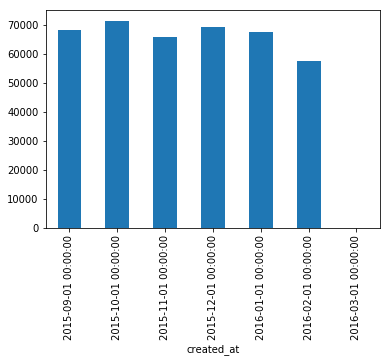

In [31]:
df['Created Date'].resample('MS').count().plot(kind="bar")

# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

In [32]:
#actually i don't have enough data to do this :-D

## Time of day

### What time of day do people complain?

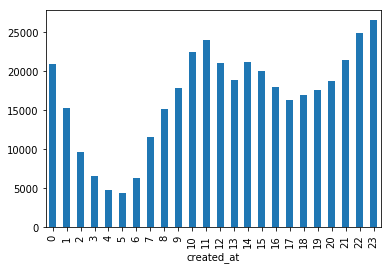

In [38]:
df.groupby(df.index.hour)['Created Date'].count().plot(kind="bar")

In [ ]:
#There are two peaks at around 11 am and 11 pm

### What time of day do people complain about potholes?

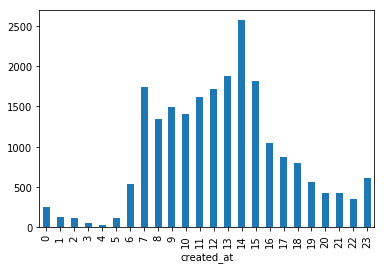

In [44]:
df_potholes = df[df['Descriptor'] == 'Pothole']
df_potholes.groupby(df_potholes.index.hour)['Created Date'].count().plot(kind="bar")
#Peaks are around 7am and 2pm

### What time of day do people complain about loud parties?

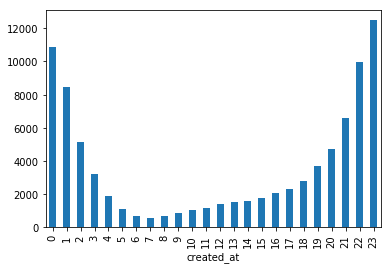

In [45]:
df_parties = df[df['Descriptor'] == 'Loud Music/Party']
df_parties.groupby(df_parties.index.hour)['Created Date'].count().plot(kind="bar")
#Peaks are between 10pm and 1am

## Days of the week

### What days of the week do people complain about potholes?

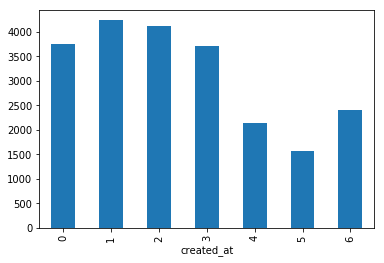

In [46]:
df_potholes.groupby(df_potholes.index.weekday)['Created Date'].count().plot(kind="bar")
#Peaks are from sunday to wednesday

### What days of the week do people complain about loud parties?

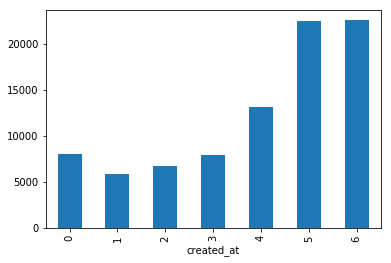

In [47]:
df_parties.groupby(df_parties.index.weekday)['Created Date'].count().plot(kind="bar")
#Peaks are on Friday and Saturday

### What do you think is the best kind of graph for describing day of the week complaints?

# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

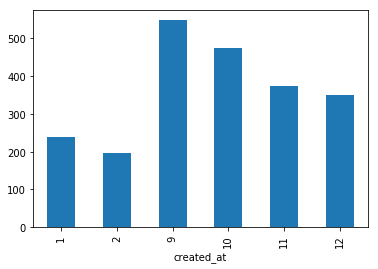

In [53]:
df_homeless = df[df['Complaint Type'] == 'Homeless Encampment']
df_homeless.groupby(df_homeless.index.month)['Created Date'].count().plot(kind="bar")
#Again, I don't have enough data to see the whole year...

## What holiday(s) are most popular for illegal fireworks?

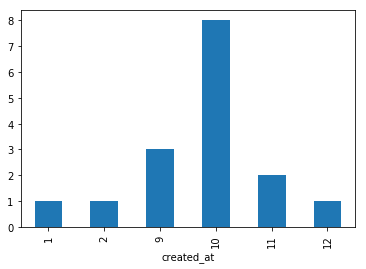

In [58]:
df_fireworks = df[df['Complaint Type'] == 'Illegal Fireworks']
df_fireworks.groupby(df_fireworks.index.month)['Created Date'].count().plot(kind="bar")
#Again, I don't have enough data to see the whole year...

## Plot all kinds of noise complaints on top of each other

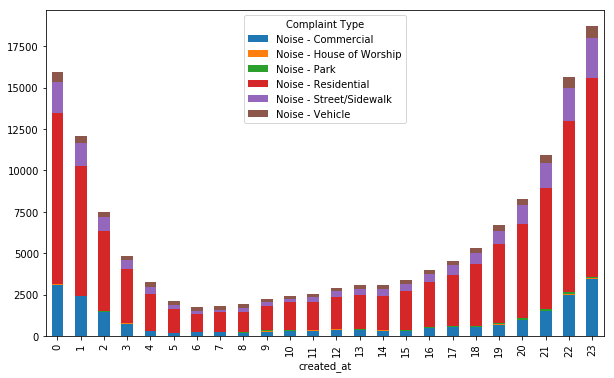

In [85]:
df_noise = df[df['Complaint Type'].str.contains("Noise")]
df_noise.groupby([df_noise.index.hour, "Complaint Type"])['Created Date'].count().unstack().plot(kind="bar", stacked=True, figsize=(10,6))